Assignment 1
P. Adam Aboud
500883647

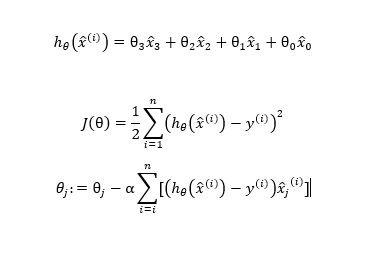

In [18]:
from IPython.display import Image
Image('img/picture.png')

1.1

![title](img/picture.png)


In [25]:
import util
import numpy as np
import matplotlib.pyplot as plt


np.seterr(all='raise')


factor = 2.0

class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, theta=None):
        """
        Args:
            theta: Weights vector for the model.
        """
        self.theta = theta
    

    def fit(self, X, y):
        """Run solver to fit linear model. You have to update the value of
        self.theta using the normal equations.

        Args:
            X: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        #matrix X
        
        data=np.array(X)
       

        
        #print(data)

        #transpose
        data.T
        #dot product of x transpose and x
        xTx=data.T.dot(data)

        #inverse
        XtX=np.linalg.inv(xTx)

        #dot product of XtX and xT
        XtX_xT=XtX.dot(data.T)

        #get thetas
        self.theta=XtX_xT.dot(y)
        #print(self.theta)
        


        return self.theta
        
            
        # *** END CODE HERE ***

    def fit_GD(self, X, y, learning_rate=0.000002, iterations=1000):
        """Run solver to fit linear model. You have to update the value of
        self.theta using the gradient descent algorithm.

        

        Args:
            X: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        count=0
        
        if self.theta==None:
            self.theta=[0]*np.shape(X)[1]

        while (count< iterations):
            #for each feaeture
            #print("ITERATION: "+str(count))


            for j in range(len(self.theta)):
                
                prediction=(self.predict(X)-y)*X[:,j]
                #print("FEATURE: " +str(j)+" "+str(sum(prediction)))

                parameter_delta=-learning_rate*(sum(prediction))
                #print(parameter_delta)
                self.theta[j]=self.theta[j]+parameter_delta
                #print(self.theta)
            count+=1
        print(self.theta)
        # *** END CODE HERE ***

    def fit_SGD(self, X, y,learning_rate=0.000002, iterations=1000):
        """Run solver to fit linear model. You have to update the value of
        self.theta using the stochastic gradient descent algorithm.

        Args:
            X: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        count=0
        if self.theta==None:
            self.theta=[0]*np.shape(X)[1]
        while (count<iterations):
            
            for i in range(len(X[:,0])):
                for j in range(len(self.theta)):
                        
                    prediction=(X[i].dot(self.theta)-y[i])
                    #print(prediction)
                    parameter_delta=learning_rate*prediction*X[i][j]
                    
                    #print(parameter_delta)
                    self.theta[j]=self.theta[j]-parameter_delta
            count+=1
                
        # *** END CODE HERE ***

    def create_poly(self, k, X):
        """
        Generates a polynomial feature map using the data x.
        The polynomial map should have powers from 0 to k
        Output should be a numpy array whose shape is (n_examples, k+1)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        # *** START CODE HERE ***
        output=[]
        for i in range(len(X[:,1])):
            x=X[i][1]
            output.append([x**l for l in range(k+1)])

        return np.array(output)
        # *** END CODE HERE ***

    def create_sin(self, k, X):
        """
        Generates a sin with polynomial featuremap to the data x.
        Output should be a numpy array whose shape is (n_examples, k+2)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        # *** START CODE HERE ***
        output=[]
        for i in range(len(X[:,1])):
            x=X[i][1]
            poly=[x**l for l in range(k+1)]
            poly.append(np.sin(x))
            output.append(poly)
        return (np.array(output))
        # *** END CODE HERE ***

    def predict(self, X):
        """
        Make a prediction given new inputs x.
        Returns the numpy array of the predictions.

        Args:
            X: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        output=[]
        #number of lines

        for i in range (len(X[:,0])):
            sum_of_predictions=0

            for j in range(len(self.theta)):

                sum_of_predictions+=X[i][j]*self.theta[j]

            output.append(sum_of_predictions)
        

        return output
        # *** END CODE HERE ***
    def predict_poly(self,X):
        output=[]
        #number of lines

        for i in range (len(X)):
            sum_of_predictions=0

            for j in range(len(self.theta)):

                sum_of_predictions+=(X[i]**j)*self.theta[j]

            #print(sum_of_predictions)
            output.append(sum_of_predictions)
        

        return output

    def predict_sin(self, X):
        output=[]
        #number of lines

        for i in range (len(X)):
            sum_of_predictions=0

            for j in range(len(self.theta)):
                if j==len(self.theta)-1:
                    sum_of_predictions+=(np.sin(X[i]))*self.theta[j]
                else:
                    sum_of_predictions+=(X[i]**j)*self.theta[j]

            #print(sum_of_predictions)
            output.append(sum_of_predictions)
        

        return output

def run_exp(train_path, sine=False, ks=[1, 2, 3,5,10,20], filename='plot.png',fit_type='normal',output=True):
    train_x,train_y=util.load_dataset(train_path,add_intercept=True)
    plot_x = np.ones([1000, 2])
    plot_x[:, 1] = np.linspace(-factor*np.pi, factor*np.pi, 1000)
    if output==True:
        plt.figure()
        plt.scatter(train_x[:, 1], train_y)


    for k in ks:
        '''
        Our objective is to train models and perform predictions on plot_x data
        '''
        # *** START CODE HERE ***
        try:
            if sine==False:
                if fit_type=='normal':
                    model=LinearModel([0]*(k+1))
                    training_data=model.create_poly(k,train_x)
                    model.fit(training_data,train_y)
                if fit_type=='GD':
                    model=LinearModel([0]*(k+1))
                    training_data=model.create_poly(k,train_x)
                    model.fit_GD(training_data,train_y)
                if fit_type=='SGD':
                    model=LinearModel([0]*(k+1))
                    training_data=model.create_poly(k,train_x)
                    model.fit_SGD(training_data,train_y)
                plot_y = model.predict_poly(plot_x[:, 1])
            else:
                if fit_type=='normal':
                    model=LinearModel([0]*(k+2))
                    training_data=model.create_sin(k,train_x)
                    model.fit(training_data,train_y)
                if fit_type=='GD':
                    model=LinearModel([0]*(k+2))
                    training_data=model.create_sin(k,train_x)
                    model.fit_GD(training_data,train_y)
                if fit_type=='SGD':
                    model=LinearModel([0]*(k+2))
                    training_data=model.create_sin(k,train_x)
                    model.fit_SGD(training_data,train_y)
                plot_y = model.predict_sin(plot_x[:, 1])

            # *** END CODE HERE ***
            '''
            Here plot_y are the predictions of the linear model on the plot_x data
            '''

            plt.ylim(-2, 2)
            plt.plot(plot_x[:, 1], plot_y, label='k=%d' % k)
        except:
            print("Error during computation")
    plt.title(filename.replace('.png',''))
    plt.legend()
    if output==True:
        plt.savefig(filename)
    plt.clf()
    return(plot_x[:,1],plot_y)

In [26]:
def main(train_path, small_path, eval_path):
    model=LinearModel()
    train_x,train_y=util.load_dataset(train_path,add_intercept=True)
    run_exp(train_path,sine=False,ks=[3],filename='img//1.2_normal_polynomial.png',fit_type='normal')
    Image('img/1.2_normal_polynomial.png.png')


if __name__ == '__main__':

    main(train_path='train.csv',
        small_path='small.csv',
        eval_path='test.csv')


&lt;Figure size 432x288 with 0 Axes&gt;